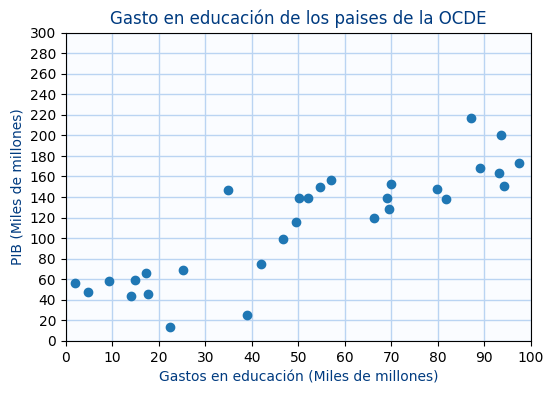

In [2]:
#Paso 1
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from keras.models import Sequential
from keras.layers import Dense
import random
from IPython import get_ipython
from pathlib import Path
import math
from sklearn.model_selection import train_test_split 
from sklearn.datasets import fetch_openml
from time import perf_counter

def save_figure(figure,file_name):
    '''
    Guarda una figura a disco en el mismo directorio que el cuaderno de Jupyter
    '''
    directorio=Path(get_ipython().user_ns.get("__vsc_ipynb_file__")).parent
    absolute_file_name=directorio / file_name
    figure.savefig(absolute_file_name,facecolor="#FFFFFF",bbox_inches='tight')

def axes_configure_for_metrics(axes,title,xlabel,ylabel,max_x=1,max_y=1.1,step_x=0.1,step_y=0.1,legend=True):
    axes.set_title(title,color="#003B80")
    axes.set_xlabel(xlabel, color="#003B80")
    axes.set_ylabel(ylabel, color="#003B80")

    if max_x is not None:
        axes.set_xlim(xmin=0,xmax=max_x)
    else:
        axes.set_xlim(xmin=0)
    if max_y is not None:  
        axes.set_ylim(ymin=0,ymax=max_y)
    else:
        axes.set_ylim(ymin=0)

    if step_x is not None:
        axes.xaxis.set_major_locator(MultipleLocator(step_x))
    if step_y is not None:
        axes.yaxis.set_major_locator(MultipleLocator(step_y))

    axes.grid(visible=True, which='major', axis='both',color="#BAD4F2",linewidth=1,zorder=-10)
    axes.set_axisbelow(True)
    axes.set_facecolor("#FAFCFF")

    if (legend):
        axes.legend()


def get_datos():
#   Los datos han sido generados aleatoriamente por este código
#   Por lo que por eso sabemos las  a y b verdaderas
#   np.random.seed(9)
#   a = 1.6
#   b = 30
#   x = np.sort(np.random.uniform(1, 99, 30))
#   y = a * x + b + np.random.normal(0, 25, size=x.shape)

    datos=np.array(
        [[  2.01666708 ,  56.18031474], [  4.79734083 ,  47.18848199], [  9.23784581 ,  57.68974048], [ 14.11529384 ,  43.70348368],
         [ 14.92688637 ,  59.10244323], [ 17.34408196 ,  65.96080804], [ 17.62435324 ,  45.74334603], [ 22.41875021 ,  13.575581  ],
         [ 25.3139145  ,  68.43756969], [ 34.85886672 , 147.15375307], [ 38.87476262 ,  25.39687009], [ 42.01380169 ,  74.39010069],
         [ 46.63551059 ,  98.93395801], [ 49.58578273 , 116.07013679], [ 50.18371003 , 138.55546747], [ 52.06630172 , 139.36601894],
         [ 54.68810274 , 150.09622546], [ 57.13046193 , 156.14375739], [ 66.35609935 , 119.75844452], [ 69.05499042 , 139.08155228],
         [ 69.51252436 , 128.72247348], [ 69.83788756 , 152.65110462], [ 79.76649746 , 148.23106977], [ 81.83730552 , 137.86314926],
         [ 87.09879038 , 217.28932067], [ 89.00469759 , 168.64994509], [ 93.17139213 , 163.10598352], [ 93.66070686 , 200.47638924],
         [ 94.1944751  , 150.44019156], [ 97.36920633 , 173.2055957 ]])

    return datos


datos=get_datos()

gasto_educacion=datos[:,0]
pib_true=datos[:,1]

figure=plt.figure(figsize=(6,4))
axes = figure.add_subplot(1,1,1)
axes.scatter(gasto_educacion,pib_true)
axes_configure_for_metrics(axes,"Gasto en educación de los paises de la OCDE","Gastos en educación (Miles de millones)","PIB (Miles de millones)",100,300,10,20,False)

save_figure(figure,"datos_pib.png")



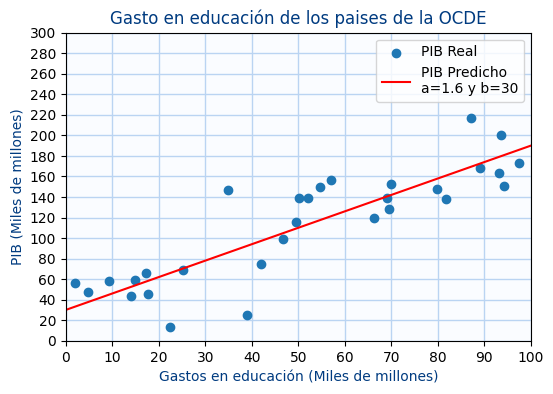

In [3]:
#Paso 2
a_modelo_correcto=1.6
b_modelo_correcto=30

x=np.linspace(0,100,50)
pib_modelo_correcto=1.6*x+30

figure=plt.figure(figsize=(6,4))
axes = figure.add_subplot(1,1,1)
axes.scatter(gasto_educacion,pib_true,label="PIB Real")
axes.plot(x,pib_modelo_correcto,label=f"PIB Predicho\na={a_modelo_correcto} y b={b_modelo_correcto}",color="#ff0000")
axes_configure_for_metrics(axes,"Gasto en educación de los paises de la OCDE","Gastos en educación (Miles de millones)","PIB (Miles de millones)",100,300,10,20)
save_figure(figure,"datos_pib_modelo_correcto.png")

/home/logongas/Documentos/desarrollo/python_default_env/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-27 11:08:59.950031: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7451 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080, pci bus id: 0000:01:00.0, compute capability: 6.1
I0000 00:00:1732702140.806107 2249664 service.cc:145] XLA service 0x725244004200 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732702140.806131 2249664 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1080, Compute Capability 6.1
2024-11-27 11:09:00.821457: I tensorflow/compiler/mlir/t

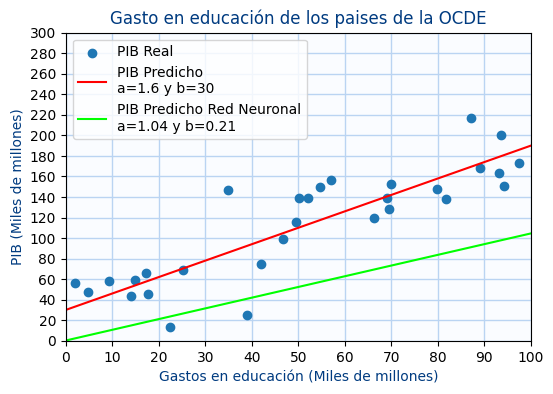

In [4]:
#Paso 3
def compile_fit(x,y,epochs):
    np.random.seed(5)
    tf.random.set_seed(5)
    random.seed(5)  
    
    model=Sequential()
    model.add(Dense(1,input_dim=1))
    model.compile(loss='mean_squared_error')
    
    
    history=model.fit(x, y,verbose=False,epochs=epochs) 

    return model,history
 
model,history=compile_fit(gasto_educacion,pib_true,200)

a_modelo_red_neuronal=model.layers[0].get_weights()[0][0,0]
b_modelo_red_neuronal=model.layers[0].get_weights()[1][0]

a_modelo_correcto=1.6
b_modelo_correcto=30
rango_gasto_educacion=np.linspace(0,100,50)
pib_modelo_correcto=a_modelo_correcto*rango_gasto_educacion+b_modelo_correcto
pib_modelo_red_neuronal=model.predict(rango_gasto_educacion.reshape(-1,1),verbose=False)

figure=plt.figure(figsize=(6,4))
axes = figure.add_subplot(1,1,1)
axes.scatter(gasto_educacion,pib_true,label="PIB Real")
axes.plot(rango_gasto_educacion,pib_modelo_correcto,label=f"PIB Predicho\na={a_modelo_correcto} y b={b_modelo_correcto}",color="#ff0000")
axes.plot(rango_gasto_educacion,pib_modelo_red_neuronal,label=f"PIB Predicho Red Neuronal\na={a_modelo_red_neuronal:.2f} y b={b_modelo_red_neuronal:.2f}",color="#00FF00")
axes_configure_for_metrics(axes,"Gasto en educación de los paises de la OCDE","Gastos en educación (Miles de millones)","PIB (Miles de millones)",100,300,10,20)


save_figure(figure,"datos_pib_modelo_red_neuronal.png")


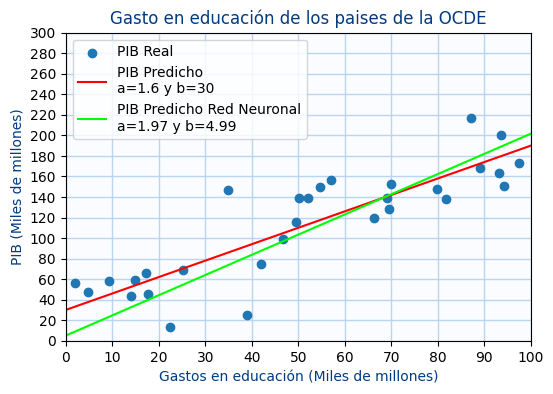

In [5]:
#Paso 4
model,history=compile_fit(gasto_educacion,pib_true,5000)

a_modelo_red_neuronal=model.layers[0].get_weights()[0][0,0]
b_modelo_red_neuronal=model.layers[0].get_weights()[1][0]
a_modelo_correcto=1.6
b_modelo_correcto=30

rango_gasto_educacion=np.linspace(0,100,50)
pib_modelo_correcto=a_modelo_correcto*rango_gasto_educacion+b_modelo_correcto

#Predict
pib_modelo_red_neuronal=model.predict(rango_gasto_educacion.reshape(-1,1),verbose=False)

figure=plt.figure(figsize=(6,4))
axes = figure.add_subplot(1,1,1)
axes.scatter(gasto_educacion,pib_true,label="PIB Real")
axes.plot(rango_gasto_educacion,pib_modelo_correcto,label=f"PIB Predicho\na={a_modelo_correcto} y b={b_modelo_correcto}",color="#ff0000")
#Resultado red neuronal
axes.plot(rango_gasto_educacion,pib_modelo_red_neuronal,label=f"PIB Predicho Red Neuronal\na={a_modelo_red_neuronal:.2f} y b={b_modelo_red_neuronal:.2f}",color="#00FF00")
axes_configure_for_metrics(axes,"Gasto en educación de los paises de la OCDE","Gastos en educación (Miles de millones)","PIB (Miles de millones)",100,300,10,20)

save_figure(figure,"datos_pib_modelo_red_neuronal_buena.png")


In [6]:
#Paso 5
pib_predicho=model.predict(gasto_educacion.reshape(-1,1),verbose=False).reshape(-1)

loss=np.sum((pib_true-pib_predicho)**2)/len(pib_true)

print(f"Loss: {loss:.3f}")


Loss: 923.572


In [7]:
# Paso 6
loss_ultima_epoca=history.history['loss'][-1]
print("Loss Última época=",loss_ultima_epoca)

Loss Última época= 923.5862426757812


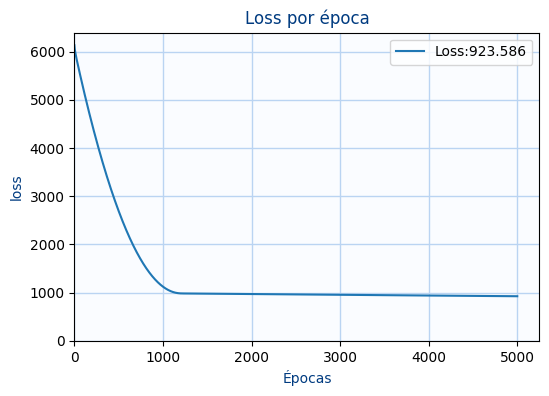

In [8]:
#Paso 7
figure=plt.figure(figsize=(6,4))
axes = figure.add_subplot(1,1,1)
axes.plot(history.history['loss'],label=f"Loss:{history.history['loss'][-1]:.3f}")
axes_configure_for_metrics(axes,"Loss por época","Épocas","loss",None,None,None,None)

save_figure(figure,"pib_modelo_red_neuronal_loss.png")

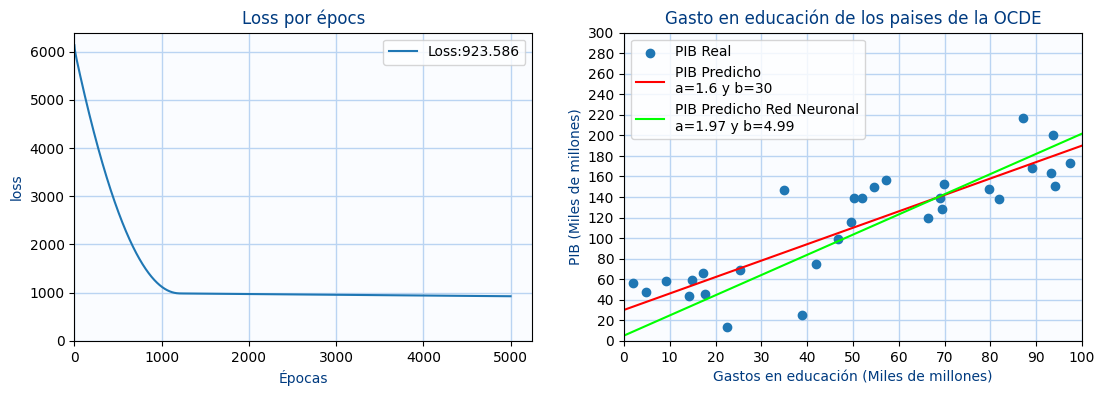

In [9]:
#Paso 8
a_modelo_red_neuronal=model.layers[0].get_weights()[0][0,0]
b_modelo_red_neuronal=model.layers[0].get_weights()[1][0]

figure=plt.figure(figsize=(13,4))
axes = figure.add_subplot(1,2,1)
axes.plot(history.history['loss'],label=f"Loss:{history.history['loss'][-1]:.3f}")
axes_configure_for_metrics(axes,"Loss por épocs","Épocas","loss",None,None,None,None)

a_modelo_correcto=1.6
b_modelo_correcto=30
rango_gasto_educacion=np.linspace(0,100,50)
pib_modelo_correcto=a_modelo_correcto*rango_gasto_educacion+b_modelo_correcto
pib_modelo_red_neuronal=model.predict(rango_gasto_educacion.reshape(-1,1),verbose=False)

axes = figure.add_subplot(1,2,2)
axes.scatter(gasto_educacion,pib_true,label="PIB Real")
axes.plot(rango_gasto_educacion,pib_modelo_correcto,label=f"PIB Predicho\na={a_modelo_correcto} y b={b_modelo_correcto}",color="#ff0000")
axes.plot(rango_gasto_educacion,pib_modelo_red_neuronal,label=f"PIB Predicho Red Neuronal\na={a_modelo_red_neuronal:.2f} y b={b_modelo_red_neuronal:.2f}",color="#00FF00")
axes_configure_for_metrics(axes,"Gasto en educación de los paises de la OCDE","Gastos en educación (Miles de millones)","PIB (Miles de millones)",100,300,10,20)

save_figure(figure,"pib_modelo_red_neuronal_loss_and_datos.png")

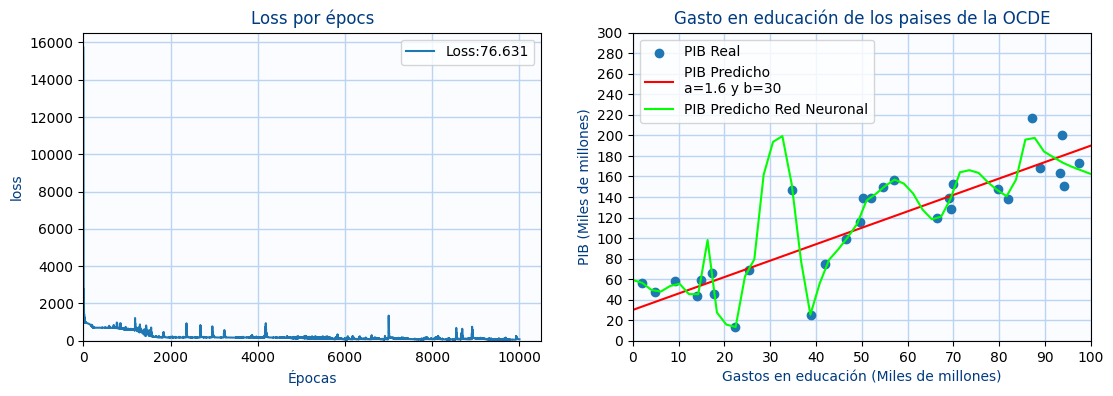

In [10]:
#Paso 9
def compile_fit(x,y,epochs):
    np.random.seed(5)
    tf.random.set_seed(5)
    random.seed(5)  
    
    model=Sequential()
    model.add(Dense(1,activation="relu",input_dim=1))
    model.add(Dense(10,activation="relu"))
    model.add(Dense(100,activation="relu"))
    model.add(Dense(300,activation="relu"))
    model.add(Dense(600,activation="relu"))
    model.add(Dense(900,activation="relu"))
    model.add(Dense(1800,activation="relu"))
    model.add(Dense(900,activation="relu"))   
    model.add(Dense(600,activation="relu"))        
    model.add(Dense(300,activation="relu"))        
    model.add(Dense(200,activation="relu"))
    model.add(Dense(100,activation="relu"))                    
    model.add(Dense(10,activation="relu"))                        
    model.add(Dense(1,input_dim=1))                        
    model.compile(loss='mean_squared_error',optimizer="Adam")
    
    
    history=model.fit(x, y,verbose=False, epochs=epochs) 

    return model,history


model,history=compile_fit(gasto_educacion,pib_true,10000)


figure=plt.figure(figsize=(13,4))
axes = figure.add_subplot(1,2,1)
axes.plot(history.history['loss'],label=f"Loss:{history.history['loss'][-1]:.3f}")
axes_configure_for_metrics(axes,"Loss por épocs","Épocas","loss",None,None,None,None)

a_modelo_correcto=1.6
b_modelo_correcto=30
rango_gasto_educacion=np.linspace(0,100,50)
pib_modelo_correcto=a_modelo_correcto*rango_gasto_educacion+b_modelo_correcto
pib_modelo_red_neuronal=model.predict(rango_gasto_educacion.reshape(-1,1),verbose=False)

axes = figure.add_subplot(1,2,2)
axes.scatter(gasto_educacion,pib_true,label="PIB Real")
axes.plot(rango_gasto_educacion,pib_modelo_correcto,label=f"PIB Predicho\na={a_modelo_correcto} y b={b_modelo_correcto}",color="#ff0000")
axes.plot(rango_gasto_educacion,pib_modelo_red_neuronal,label="PIB Predicho Red Neuronal",color="#00FF00")
axes_configure_for_metrics(axes,"Gasto en educación de los paises de la OCDE","Gastos en educación (Miles de millones)","PIB (Miles de millones)",100,300,10,20)

save_figure(figure,"pib_modelo_red_neuronal_sobreajuste_loss_datos.png")

In [11]:
pib_predicho=model.predict(gasto_educacion.reshape(-1,1),verbose=False).reshape(-1)

loss=np.sum((pib_true-pib_predicho)**2)/len(pib_true)

print("Loss=",loss)

Loss= 76.82424462557391


In [12]:
#Paso 10
def get_datos_validacion():
    datos_validacion=np.array(
        [[  1.22140488 , 59.35315077] , [  2.42834632 ,  3.50613409] , [  4.27529991 , 70.39938914] ,
        [ 14.44651349 , 50.0606769 ] , [ 16.10795855 , 81.08562061] , [ 16.75024181 , 33.95365822] ,
        [ 26.80487149 , 47.1495392 ] , [ 28.81517859 ,106.34919698] , [ 48.56698654 ,120.25398606] ,
        [ 52.08015067 ,116.7993955 ] , [ 53.30646055 ,131.30936472] , [ 55.09968806 ,131.34281752] ,
        [ 60.39615207 , 97.77483743] , [ 73.52487026 , 92.30645543] , [ 76.2771471  ,109.9995226 ] ,
        [ 84.56808303 ,120.60657657] , [ 89.2700557  ,117.3687155 ] , [ 91.03720679 ,159.47376137] ,
        [ 93.53406333 ,166.44439331] , [ 94.78103495 ,180.66942656]]
        )
    return datos_validacion

datos_validacion=get_datos_validacion()
gasto_educacion_validacion=datos_validacion[:,0]
pib_validacion_true=datos_validacion[:,1]

pib_predicho_validacion=model.predict(gasto_educacion_validacion.reshape(-1,1),verbose=False).reshape(-1)

loss=np.sum((pib_predicho_validacion-pib_validacion_true)**2)/len(pib_predicho_validacion)

print("Loss=",loss)

Loss= 1636.3078156164459


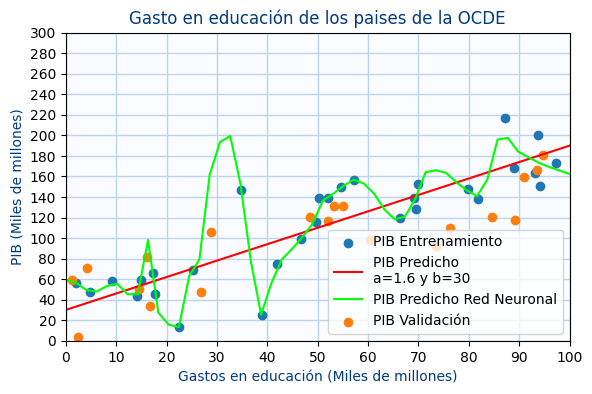

In [13]:
#Paso 10
figure=plt.figure(figsize=(6.5,4))
a_modelo_correcto=1.6
b_modelo_correcto=30
rango_gasto_educacion=np.linspace(0,100,50)
pib_modelo_correcto=a_modelo_correcto*rango_gasto_educacion+b_modelo_correcto
pib_modelo_red_neuronal=model.predict(rango_gasto_educacion.reshape(-1,1),verbose=False)

axes = figure.add_subplot(1,1,1)
axes.scatter(gasto_educacion,pib_true,label="PIB Entrenamiento")
axes.plot(rango_gasto_educacion,pib_modelo_correcto,label=f"PIB Predicho\na={a_modelo_correcto} y b={b_modelo_correcto}",color="#ff0000")
axes.plot(rango_gasto_educacion,pib_modelo_red_neuronal,label="PIB Predicho Red Neuronal",color="#00FF00")
axes.scatter(gasto_educacion_validacion,pib_validacion_true,label=f"PIB Validación")
axes_configure_for_metrics(axes,"Gasto en educación de los paises de la OCDE","Gastos en educación (Miles de millones)","PIB (Miles de millones)",100,300,10,20)

save_figure(figure,"pib_modelo_red_neuronal_sobreajuste_loss_datos_validacion.png")

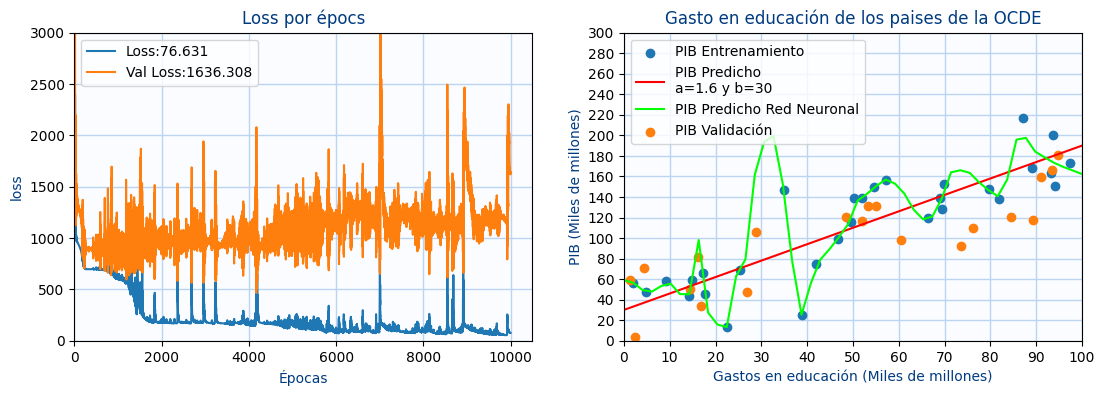

In [14]:
#Paso 11
def compile_fit(x,y,x_val,y_val,epochs):
    np.random.seed(5)
    tf.random.set_seed(5)
    random.seed(5)  
    
    model=Sequential()
    model.add(Dense(1,activation="relu",input_dim=1))
    model.add(Dense(10,activation="relu"))
    model.add(Dense(100,activation="relu"))
    model.add(Dense(300,activation="relu"))
    model.add(Dense(600,activation="relu"))
    model.add(Dense(900,activation="relu"))
    model.add(Dense(1800,activation="relu"))
    model.add(Dense(900,activation="relu"))   
    model.add(Dense(600,activation="relu"))        
    model.add(Dense(300,activation="relu"))        
    model.add(Dense(200,activation="relu"))
    model.add(Dense(100,activation="relu"))                    
    model.add(Dense(10,activation="relu"))                        
    model.add(Dense(1,input_dim=1))                        
    model.compile(loss='mean_squared_error',optimizer="Adam")
    
    
    history=model.fit(x, y,validation_data=(x_val,y_val), verbose=False, epochs=epochs) 

    return model,history

model,history=compile_fit(gasto_educacion,pib_true,gasto_educacion_validacion,pib_validacion_true, 10000)

a_modelo_red_neuronal=model.layers[0].get_weights()[0][0,0]
b_modelo_red_neuronal=model.layers[0].get_weights()[1][0]

figure=plt.figure(figsize=(13,4))
axes = figure.add_subplot(1,2,1)
axes.plot(history.history['loss'],label=f"Loss:{history.history['loss'][-1]:.3f}")
axes.plot(history.history['val_loss'],label=f"Val Loss:{history.history['val_loss'][-1]:.3f}")
axes_configure_for_metrics(axes,"Loss por épocs","Épocas","loss",None,3000,None,None)

a_modelo_correcto=1.6
b_modelo_correcto=30
rango_gasto_educacion=np.linspace(0,100,50)
pib_modelo_correcto=a_modelo_correcto*rango_gasto_educacion+b_modelo_correcto
pib_modelo_red_neuronal=model.predict(rango_gasto_educacion.reshape(-1,1),verbose=False)

axes = figure.add_subplot(1,2,2)
axes.scatter(gasto_educacion,pib_true,label="PIB Entrenamiento")
axes.plot(rango_gasto_educacion,pib_modelo_correcto,label=f"PIB Predicho\na={a_modelo_correcto} y b={b_modelo_correcto}",color="#ff0000")
axes.plot(rango_gasto_educacion,pib_modelo_red_neuronal,label=f"PIB Predicho Red Neuronal",color="#00FF00")
axes.scatter(gasto_educacion_validacion,pib_validacion_true,label=f"PIB Validación")
axes_configure_for_metrics(axes,"Gasto en educación de los paises de la OCDE","Gastos en educación (Miles de millones)","PIB (Miles de millones)",100,300,10,20)

save_figure(figure,"pib_modelo_red_neuronal_loss_and_datos_validacion.png")

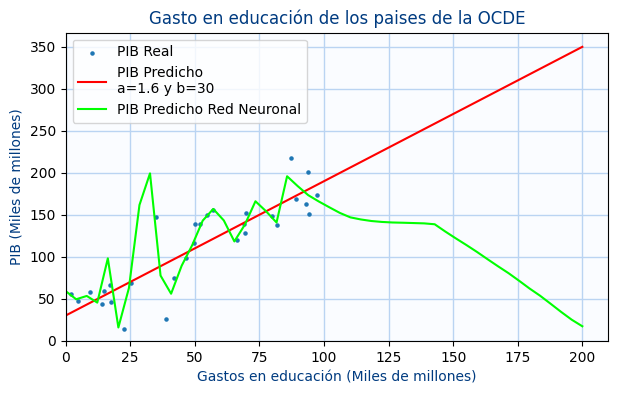

In [15]:
#Paso 12
figure=plt.figure(figsize=(7,4))
a_modelo_correcto=1.6
b_modelo_correcto=30

rango_gasto_educacion=np.linspace(0,200,50)
pib_modelo_correcto=a_modelo_correcto*rango_gasto_educacion+b_modelo_correcto

#Predict
pib_modelo_red_neuronal=model.predict(rango_gasto_educacion.reshape(-1,1),verbose=False)

axes = figure.add_subplot(1,1,1)
axes.scatter(gasto_educacion,pib_true,label="PIB Real",s=5)
axes.plot(rango_gasto_educacion,pib_modelo_correcto,label=f"PIB Predicho\na={a_modelo_correcto} y b={b_modelo_correcto}",color="#ff0000")
#Resultado red neuronal
axes.plot(rango_gasto_educacion,pib_modelo_red_neuronal,label="PIB Predicho Red Neuronal",color="#00FF00")
axes_configure_for_metrics(axes,"Gasto en educación de los paises de la OCDE","Gastos en educación (Miles de millones)","PIB (Miles de millones)",None,None,None,None)

save_figure(figure,"pib_modelo_red_neuronal_sobreajuste_loss_and_datos_ood.png")


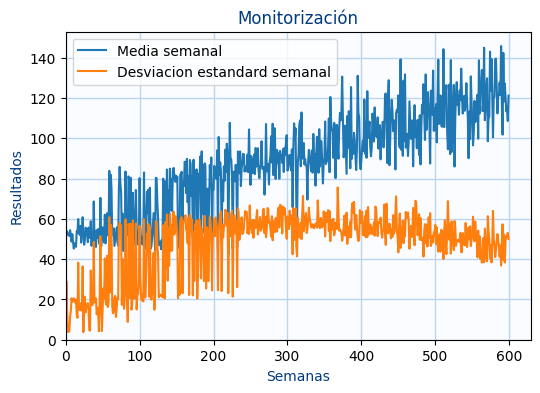

In [16]:
#Paso 13
#Out-of-Distribution (OOD)
np.random.seed(8)
def get_gastos_educacion(semana):
    num_predicciones_semanales=300
    gastos_educacion=np.random.uniform((semana/np.random.uniform(20,30)),30+(semana/np.random.uniform(5,20))-np.random.uniform(1,20),num_predicciones_semanales)
    gastos_educacion=gastos_educacion[gastos_educacion>1]

    return gastos_educacion

semanas=600
medias=[]
desv_stds=[]
for semana in range(0,semanas):
    gastos_educacion=get_gastos_educacion(semana)
    pib=model.predict(gastos_educacion.reshape(-1,1),verbose=False)
    media=np.mean(pib)
    desv_std= np.std(pib, ddof=1)

    medias.append(media)
    desv_stds.append(desv_std)

    
figure=plt.figure(figsize=(6,4))
axes = figure.add_subplot(1,1,1)
axes.plot(medias,label="Media semanal")
axes.plot(desv_stds,label=f"Desviacion estandard semanal")
axes_configure_for_metrics(axes,"Monitorización","Semanas","Resultados",None,None,None,None)

save_figure(figure,"pib_modelo_red_neuronal_monitorizacion.png")

/home/logongas/Documentos/desarrollo/python_default_env/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Nombre  Capas                               Épocas  Activación                MSE               R²           Tiempo           MSE            R²
     Red                                                              Entrenamiento    Entrenamiento    Entrenamiento    Validación    Validación
--------  --------------------------------  --------  ------------  ---------------  ---------------  ---------------  ------------  ------------
       1  [20, 1]                                300  relu                 25.9903        0.700825            13.2181       24.1596     0.670553
       2  [20, 1]                                300  selu                 23.1742        0.733241            12.6924       21.8751     0.701705
       3  [20, 1]                                300  tanh                 69.747         0.197143            12.3714       61.0294     0.167786
       4  [20, 10, 1]                            300  relu                 24.5118        0.717845            12.8602       26.

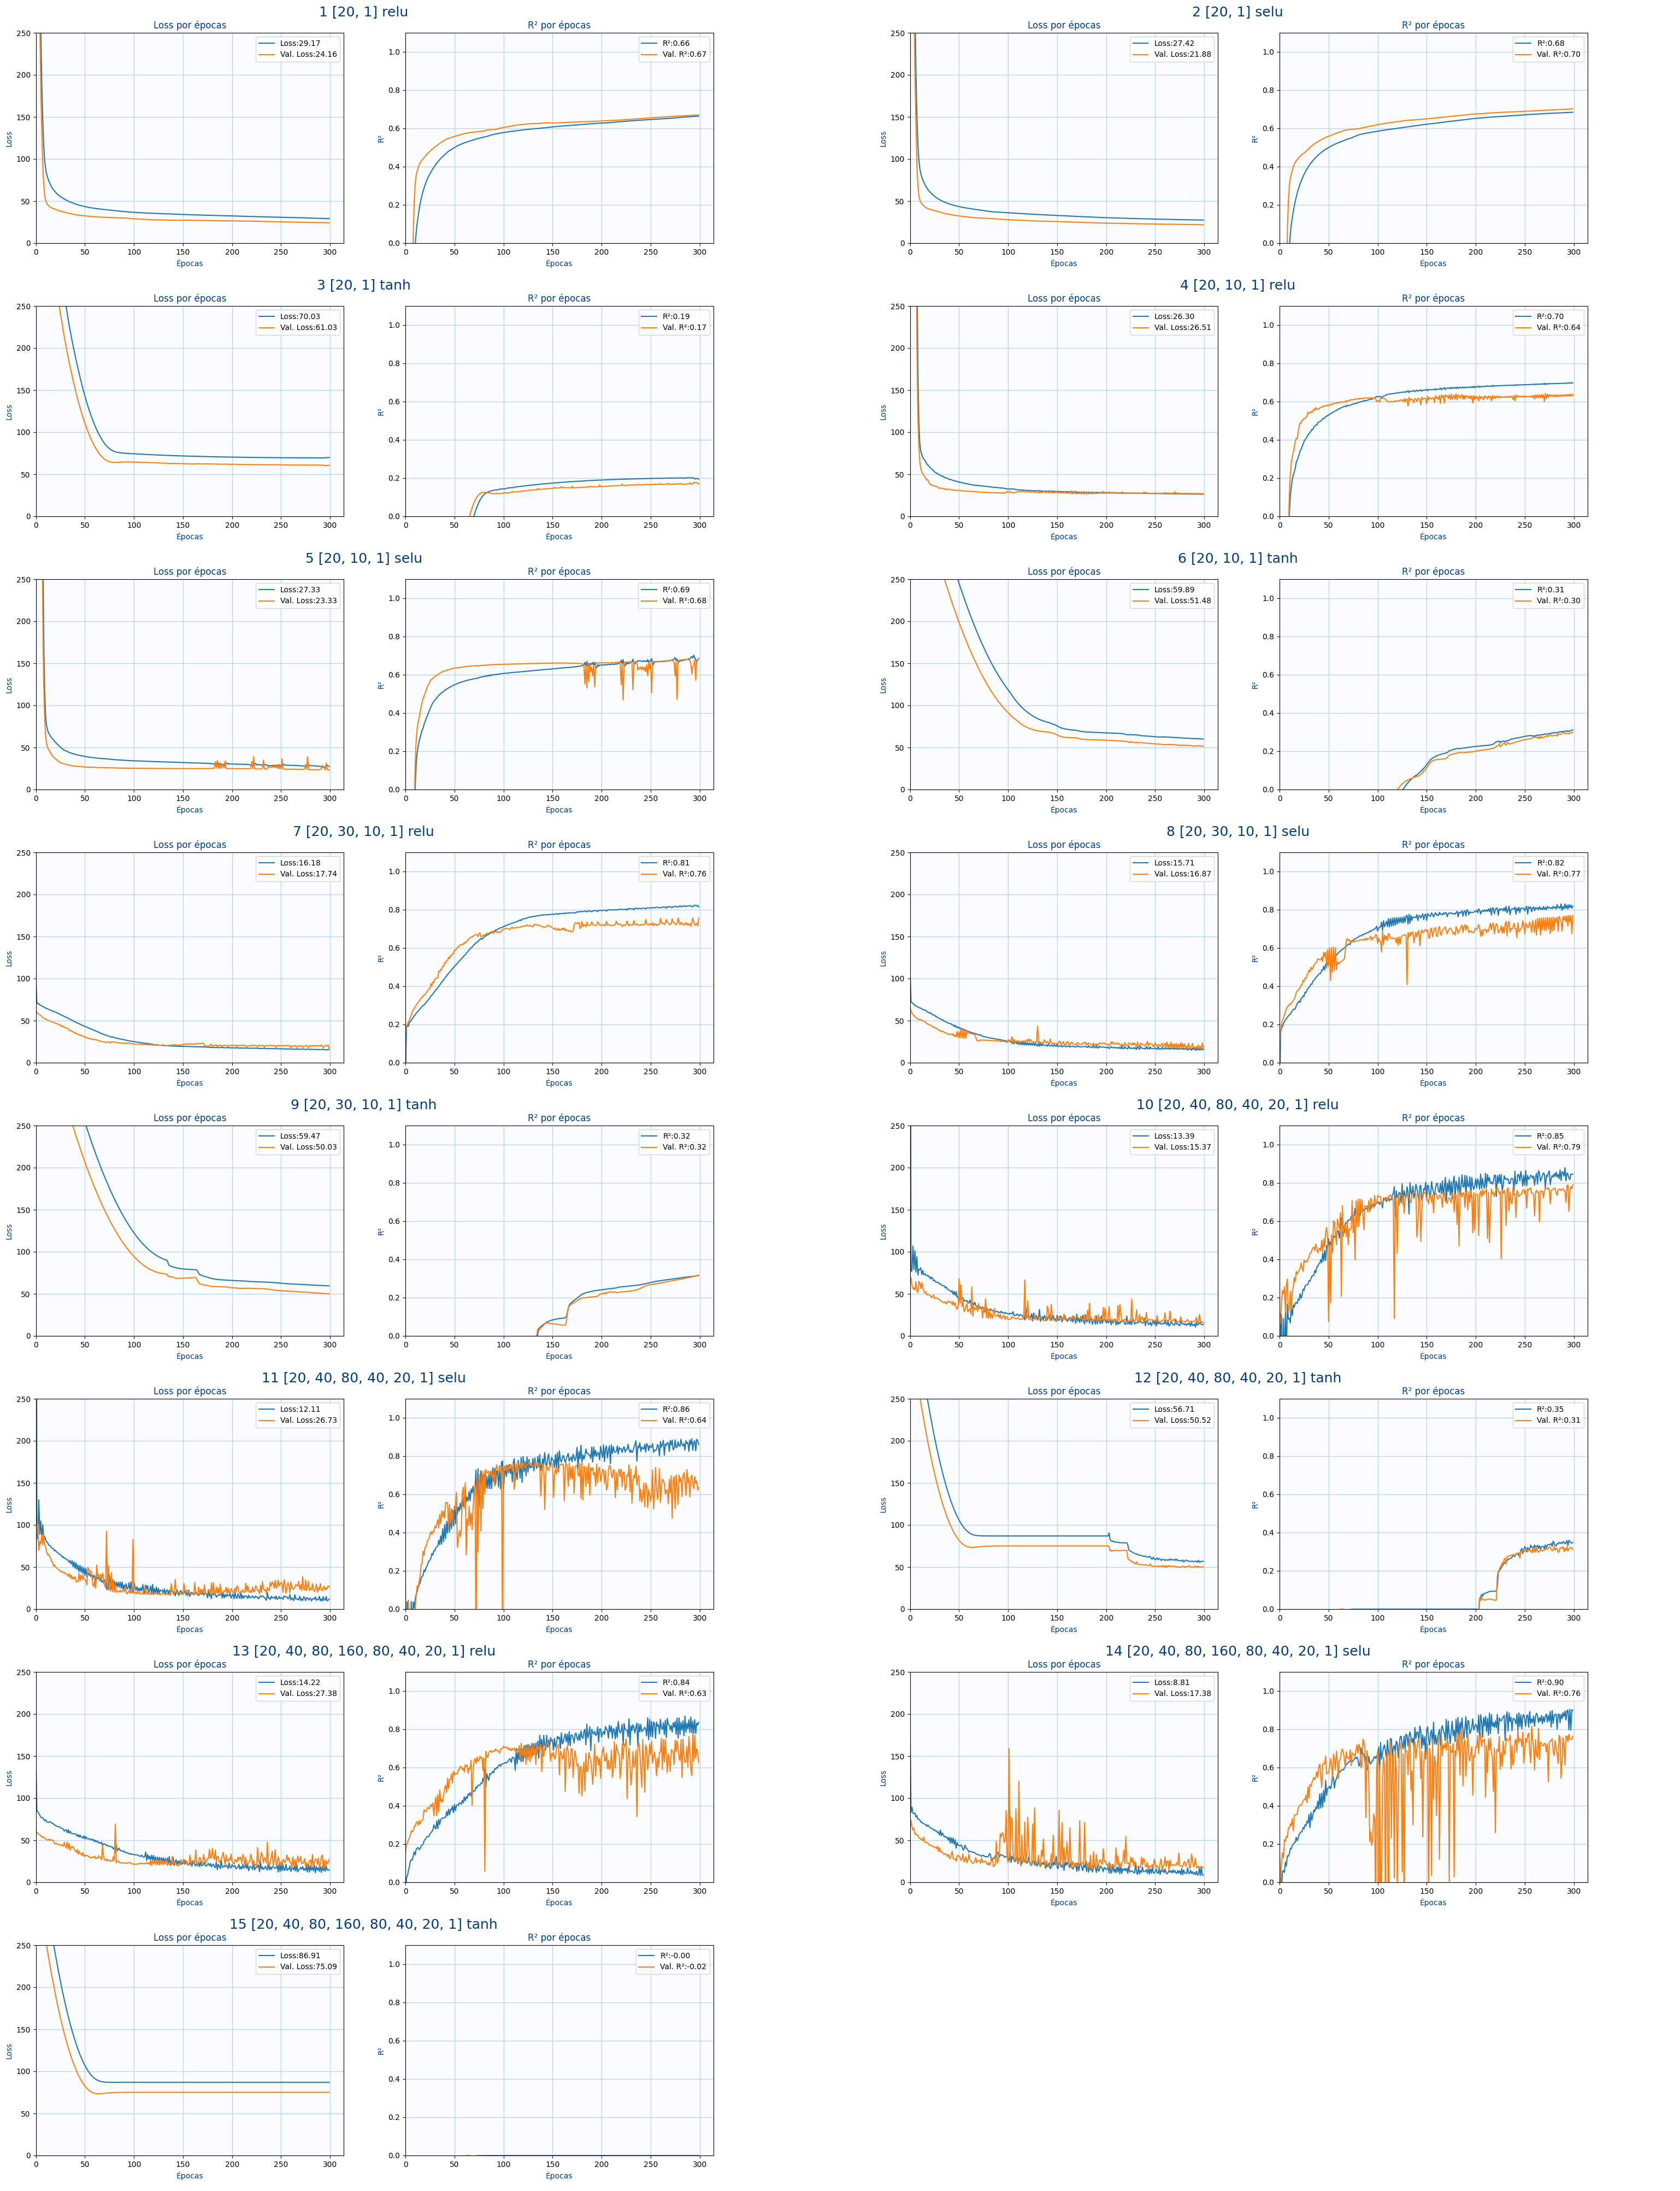

In [17]:
#Paso 14
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import random
from tabulate import tabulate



def axes_configure_for_metrics(axes,title,xlabel,ylabel,max_x=1,max_y=1.1,step_x=0.1,step_y=0.1,legend=True):
    axes.set_title(title,color="#003B80")
    axes.set_xlabel(xlabel, color="#003B80")
    axes.set_ylabel(ylabel, color="#003B80")

    if max_x is not None:
        axes.set_xlim(xmin=0,xmax=max_x)
    else:
        axes.set_xlim(xmin=0)
    if max_y is not None:  
        axes.set_ylim(ymin=0,ymax=max_y)
    else:
        axes.set_ylim(ymin=0)

    if step_x is not None:
        axes.xaxis.set_major_locator(MultipleLocator(step_x))
    if step_y is not None:
        axes.yaxis.set_major_locator(MultipleLocator(step_y))

    axes.grid(visible=True, which='major', axis='both',color="#BAD4F2",linewidth=1,zorder=-10)
    axes.set_axisbelow(True)
    axes.set_facecolor("#FAFCFF")

    if (legend):
        axes.legend()



def get_mse(y_true,y_pred):
    y_error=(y_true-y_pred)**2
    mse=np.sum(y_error)/np.size(y_error)

    return mse

def get_coeficiente_determinacion(y_true,y_pred):
    media_valores_verdaderos=np.sum(y_true)/np.size(y_true)
    suma_errores=np.sum((y_true-y_pred)**2)
    suma_valores_media=np.sum((y_true-media_valores_verdaderos)**2)
    coeficiente_determinacion=1-(suma_errores/suma_valores_media)

    return coeficiente_determinacion


def get_metricas_modelo(model,x,y_true):
    y_pred=model.predict(x,verbose=False)
    mse=get_mse(y_true,y_pred)
    coeficiente_determinacion=get_coeficiente_determinacion(y_true,y_pred)

    return mse,coeficiente_determinacion

def compile_fit(capas,x,y,x_validacion,y_entrenamiento,epochs,activation):
    np.random.seed(5)
    tf.random.set_seed(5)
    random.seed(5)  
    
    model=Sequential()
    for index,neuronas_capa in enumerate(capas):
        if (index==0):
            model.add(Dense(neuronas_capa, activation=activation,input_dim=x.shape[1]))
        elif (index==len(capas)-1):
            model.add(Dense(neuronas_capa, activation='linear'))
        else:
            model.add(Dense(neuronas_capa, activation=activation))
    model.compile(loss='mean_squared_error',metrics=[tf.keras.metrics.R2Score()])
    
    tiempo_entrenamiento = perf_counter()
    history=model.fit(x, y,epochs=epochs,verbose=False,validation_data=(x_validacion,y_entrenamiento)) 
    tiempo_entrenamiento=perf_counter()-tiempo_entrenamiento

    return model,history,tiempo_entrenamiento

def get_datos():
    boston=fetch_openml(name="boston",version=1)   
    x=np.array(boston.data).astype(np.float32)
    y=np.array(boston.target).astype(np.float32)

    x_entrenamiento, x_validacion, y_entrenamiento, y_validacion = train_test_split(x, y, test_size=0.2, random_state=42)

    return x_entrenamiento, y_entrenamiento.reshape(-1,1), x_validacion, y_validacion.reshape(-1,1)



x_entrenamiento, y_entrenamiento, x_validacion, y_validacion=get_datos()



redes_neuronales=[
    [[20,1],"relu"],
    [[20,1],"selu"],
    [[20,1],"tanh"],       
    [[20,10,1],"relu"],
    [[20,10,1],"selu"],
    [[20,10,1],"tanh"],        
    [[20,30,10,1],"relu"],
    [[20,30,10,1],"selu"],
    [[20,30,10,1],"tanh"],  
    [[20,40,80,40,20,1],"relu"],
    [[20,40,80,40,20,1],"selu"],
    [[20,40,80,40,20,1],"tanh"],
    [[20,40,80,160,80,40,20,1],"relu"],
    [[20,40,80,160,80,40,20,1],"selu"],
    [[20,40,80,160,80,40,20,1],"tanh"]                               
]    

epochs=300

resultados=[]

nrows=len(redes_neuronales)
figure=plt.figure(figsize=(4*8,5*math.ceil(nrows/2)))
subfigures = figure.subfigures(nrows=math.ceil(nrows/2), ncols=2).reshape(-1)

for index,(capas,activacion) in enumerate(redes_neuronales):

    model,history,tiempo_entrenamiento=compile_fit(capas,x_entrenamiento,y_entrenamiento, x_validacion, y_validacion,epochs,activacion)
    mse_entrenamiento,coeficiente_determinacion_entrenamiento=get_metricas_modelo(model,x_entrenamiento,y_entrenamiento)
    mse_validacion,coeficiente_determinacion_validacion=get_metricas_modelo(model,x_validacion,y_validacion)   

    resultado=[str(index+1),str(capas),epochs,activacion,mse_entrenamiento,coeficiente_determinacion_entrenamiento,tiempo_entrenamiento,mse_validacion,coeficiente_determinacion_validacion]
    resultados.append(resultado) 

    subfigure=subfigures[index]
    subfigure.suptitle(str(index+1)+" "+str(capas)+" "+activacion,fontsize=18, color="#003B80")

    axes = subfigure.add_subplot(1,2,1)
    axes.plot(history.history['loss'],label=f"Loss:{history.history['loss'][-1]:.2f}")
    axes.plot(history.history['val_loss'],label=f"Val. Loss:{history.history['val_loss'][-1]:.2f}")            
    axes_configure_for_metrics(axes,"Loss por épocas","Épocas","Loss",None,250,None,None)

    axes = subfigure.add_subplot(1,2,2)
    axes.plot(history.history['r2_score'],label=f"R²:{history.history['r2_score'][-1]:.2f}")
    axes.plot(history.history['val_r2_score'],label=f"Val. R²:{history.history['val_r2_score'][-1]:.2f}")            
    axes_configure_for_metrics(axes,"R² por épocas","Épocas","R²",None,1.1,None,None)




print(tabulate(resultados,headers=["Nombre\nRed","Capas","Épocas","Activación","MSE\nEntrenamiento","R²\nEntrenamiento","Tiempo\nEntrenamiento","MSE\nValidación","R²\nValidación"]))

save_figure(figure,"boston_loss_metrics_300_epocas.png")

  Nombre  Capas                               Épocas  Activación                MSE               R²           Tiempo           MSE            R²
     Red                                                              Entrenamiento    Entrenamiento    Entrenamiento    Validación    Validación
--------  --------------------------------  --------  ------------  ---------------  ---------------  ---------------  ------------  ------------
       1  [20, 1]                                 10  relu                  86.132       0.00853485           1.14166       56.7836     0.225683
       2  [20, 1]                                 10  selu                  86.8242      0.000566959          1.06784       56.9691     0.223154
       3  [20, 1]                                 10  tanh                 444.101      -4.11204              1.07382      383.456     -4.22891
       4  [20, 10, 1]                             10  relu                  93.3557     -0.0746181            1.19141       82.6

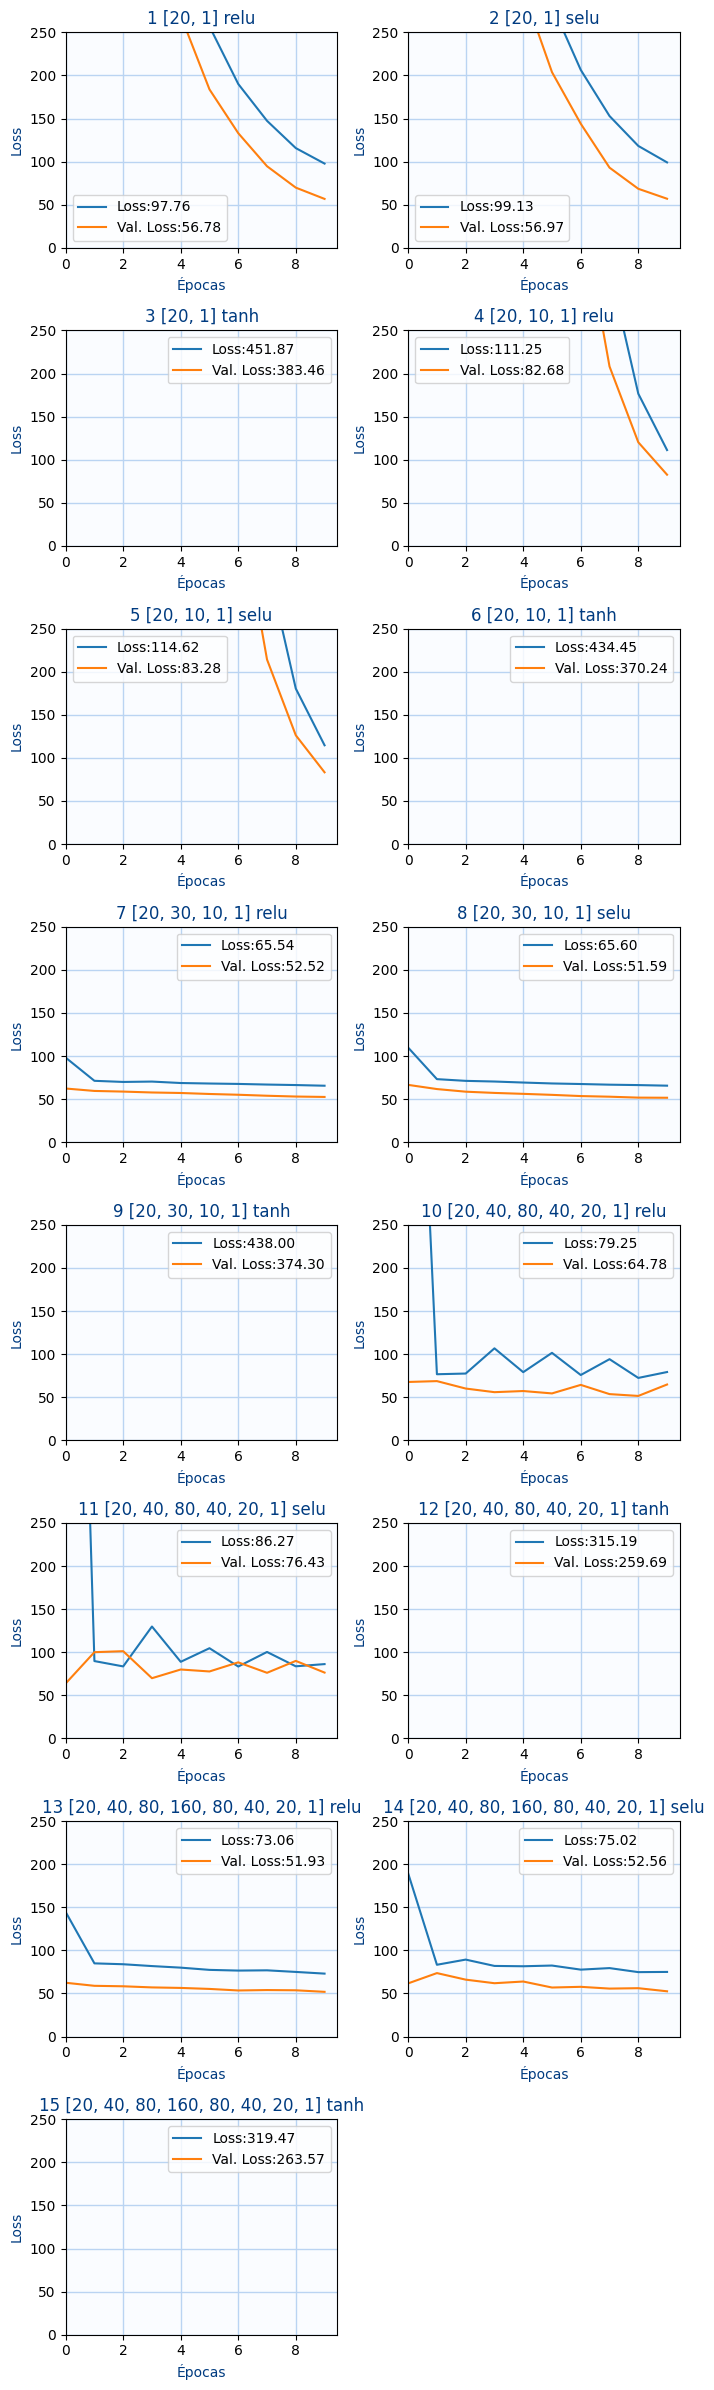

In [18]:

redes_neuronales=[
    [[20,1],"relu"],
    [[20,1],"selu"],
    [[20,1],"tanh"],       
    [[20,10,1],"relu"],
    [[20,10,1],"selu"],
    [[20,10,1],"tanh"],        
    [[20,30,10,1],"relu"],
    [[20,30,10,1],"selu"],
    [[20,30,10,1],"tanh"],  
    [[20,40,80,40,20,1],"relu"],
    [[20,40,80,40,20,1],"selu"],
    [[20,40,80,40,20,1],"tanh"],
    [[20,40,80,160,80,40,20,1],"relu"],
    [[20,40,80,160,80,40,20,1],"selu"],
    [[20,40,80,160,80,40,20,1],"tanh"]                               
]                            

epochs=10

resultados=[]

ncols=2
nrows=math.ceil(len(redes_neuronales)/ncols)
figure=plt.figure(figsize=(3.5*ncols,3*nrows))

for index,(capas,activacion) in enumerate(redes_neuronales):

    model,history,tiempo_entrenamiento=compile_fit(capas,x_entrenamiento,y_entrenamiento, x_validacion, y_validacion,epochs,activacion)
    mse_entrenamiento,coeficiente_determinacion_entrenamiento=get_metricas_modelo(model,x_entrenamiento,y_entrenamiento)
    mse_validacion,coeficiente_determinacion_validacion=get_metricas_modelo(model,x_validacion,y_validacion)   

    resultado=[str(index+1),str(capas),epochs,activacion,mse_entrenamiento,coeficiente_determinacion_entrenamiento,tiempo_entrenamiento,mse_validacion,coeficiente_determinacion_validacion]
    resultados.append(resultado) 


    axes = figure.add_subplot(nrows,ncols,index+1)
    axes.plot(history.history['loss'],label=f"Loss:{history.history['loss'][-1]:.2f}")
    axes.plot(history.history['val_loss'],label=f"Val. Loss:{history.history['val_loss'][-1]:.2f}")            
    axes_configure_for_metrics(axes,str(index+1)+" "+str(capas)+" "+activacion,"Épocas","Loss",None,250,None,None)


figure.tight_layout()

print(tabulate(resultados,headers=["Nombre\nRed","Capas","Épocas","Activación","MSE\nEntrenamiento","R²\nEntrenamiento","Tiempo\nEntrenamiento","MSE\nValidación","R²\nValidación"]))

save_figure(figure,"boston_loss_metrics_10_epocas.png")